<a href="https://colab.research.google.com/github/AhmetSarici/DataScience/blob/main/DogrusalRegresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basit Doğrusal Regresyon

## Modelleme 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Veri Bilimi/VBO/dogrusal_reg_kuzenleri/ml_2_dogrusal_reg_kuzenleri")

In [3]:
!pwd

/content/drive/My Drive/Colab Notebooks/Veri Bilimi/VBO/dogrusal_reg_kuzenleri/ml_2_dogrusal_reg_kuzenleri


In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

Reklam giderleri üzerine veri seti

In [5]:
import pandas as pd
#Belirli Kolonları seçme
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
#df = df.iloc[:,1:len(df)]

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [10]:
#Hiç null değer var mı?
df.isnull().values.any()

False

In [11]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Sales bağımlı değişkeni üzerinden baktığımızda TV ile yüksek bir korelasyon bulunmakta. TV reklamları arttıkça satış artışında en etkin korelasyona sahip.
TV ile radio değişkeni arasında korelasyon düşük. Sales değişkeni radio ile olan ilişkisine de odaklanılabilinir.

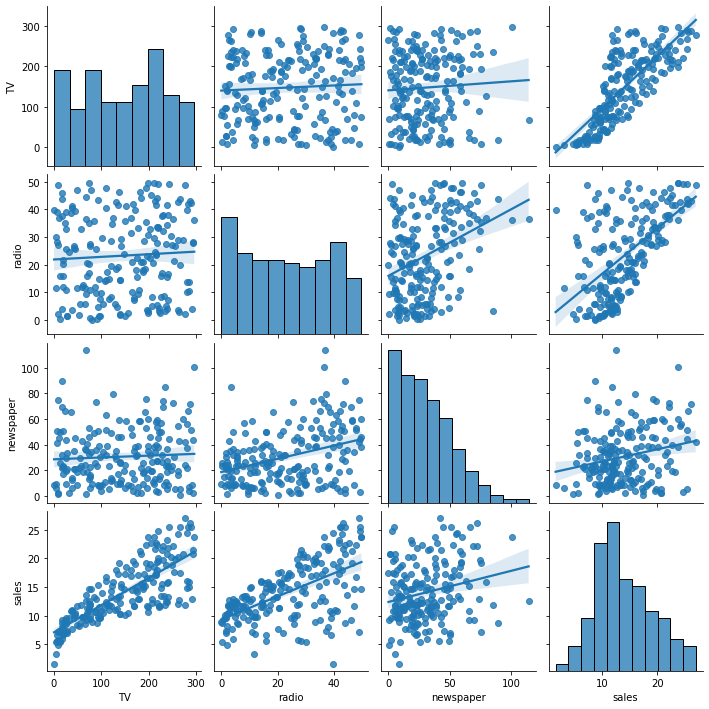

In [12]:
import seaborn as sns
sns.pairplot(df, kind  ="reg");

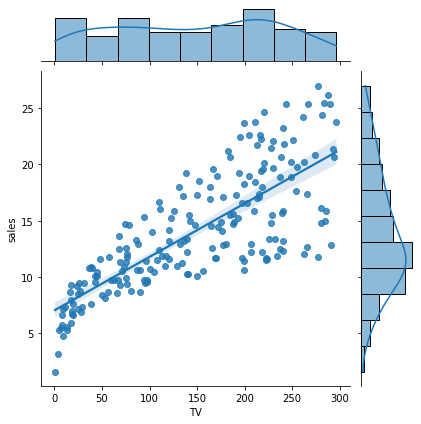

In [13]:
sns.jointplot(x = "TV", 
              y = "sales", 
              data = df, 
              kind = "reg");

## Statsmodels ile modelleme

In [14]:
import statsmodels.api as sm

In [15]:
X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [16]:
#matrise 1 değerlerinden oluşan değişken aklemek
X = sm.add_constant(X)

In [17]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [18]:
y = df["sales"]

In [19]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [20]:
#Model kurulumu
lm = sm.OLS(y,X)

In [21]:
model = lm.fit()

In [22]:
#Stats model ile istatistiksel anlamda veri sağlamaktadır.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 31 May 2022   Prob (F-statistic):           1.47e-42
Time:                        13:24:39   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-suquared     =** Bağımsız değişkenin bağımlı değişkendeki değişkenliğin açıklanabilirlik oranını verir.Açıklanabilirlik oranı
**Adj.R-suquared =** Her parametresine duyarlılığı daha az olan değerdir.

**F- istatistiği =** Modelin anlamlılığına ilişkin

**Prob           =** F istatistiğine ilişkin P-value değeri

**coef            =** Katsayı b1 P-value değerina göre anlamlı
cosnst          = Katsayı b0 P-value değerina göre anlamlı



In [23]:
#Değişken isimleri girerek modelleme
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 31 May 2022   Prob (F-statistic):           1.47e-42
Time:                        13:24:39   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#Katsayılara ulaşmak için b0,b1
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [25]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [26]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [27]:
model.f_pvalue #modelin anlamlılığı

1.4673897001947095e-42

In [28]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [29]:
print("fvalue: ", "%.2f" % model.fvalue)

fvalue:  312.14


In [30]:
#Parametre anlamlılığı
print("tvalue: ", "%.2f" % model.tvalues[0:1])

tvalue:  15.36


In [31]:
#Açıklanabilirlik oranı
model.rsquared_adj

0.6099148238341623

In [32]:
#Modelin tahmin ettiği değerler
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [33]:
#Gerçek Y değerleri
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [34]:
print("Sales = " + 
      str("%.2f" % model.params[0]) + 
      " + TV" + 
      " * " + 
      str("%.2f" % model.params[1]))

Sales = 7.03 + TV * 0.05


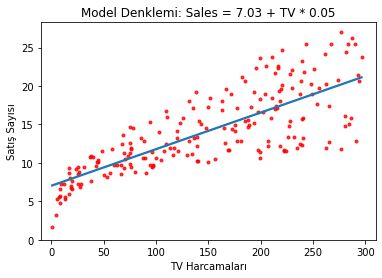

In [35]:
g = sns.regplot(df["TV"], 
                df["sales"], 
                ci=None, 
                scatter_kws={'color':'r', 's':9})

g.set_title("Model Denklemi: Sales = 7.03 + TV * 0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")

import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

Scikit-Learn ile Modelleme

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_ #b0 katsayısı


7.032593549127695

In [38]:
model.coef_      #b1 katsayısı

array([0.04753664])

In [39]:
#Modelin r^2 değeri
model.score(X,y)

0.611875050850071

In [40]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## Tahmin

Model denklemi:

Sales = 7.03 + TV*0.04

Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [41]:
7.03 + 30*0.04

8.23

In [42]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y) #predict yapacak duruma getirilmesi

In [43]:
#Kendisine girilen değere yönelik çıktı üretiyor
model.predict([[30]])

array([8.45869276])

In [44]:
#Array (Liste) üzerinden 
yeni_veri = [[5],[90],[200]]

In [45]:
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

## Hata Kareleri (Artıklar) ve Makine Öğrenmesindeki Önemi

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [48]:
mse = mean_squared_error(y, model.fittedvalues)

In [49]:
#Gerçek değerlerle tahmin edilen değerler farklarının kareleri alınarak ortalaması
#Birim başına ortalama hata
mse

10.512652915656753

In [50]:
#MSE karekökü
import numpy as np
rmse = np.sqrt(mse)

In [51]:
rmse

3.2423221486546883

In [52]:
#Tahmin edilen değerler
reg.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [53]:
y[0:10] #Gerçek değerler

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [54]:
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": reg.predict(X)[0:10]})

In [55]:
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [56]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]

In [57]:
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [58]:
k_t["hata_kare"] = k_t["hata"]**2

In [59]:
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [60]:
#MSE
np.sum(k_t["hata_kare"])

92.90350329638102

In [61]:
#RMSE
np.mean(k_t["hata_kare"])

9.290350329638102

In [62]:
#Hata kareleri ort. karesi
np.sqrt(np.mean(k_t["hata_kare"]))

3.048007599996775

In [63]:
#Hata (artıklar)
model.resid[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

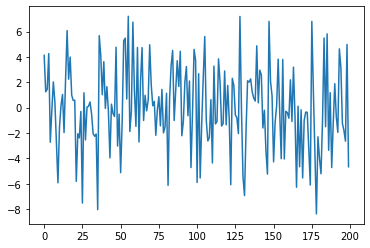

In [64]:
plt.plot(model.resid);